In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# title.basics
title_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep ='\t', low_memory = False)

## 1. Principales infos

In [3]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468615 entries, 0 to 8468614
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 581.5+ MB


In [5]:
title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [6]:
title_basics.shape

(8468615, 9)

In [7]:
# copy du dataset
title_basics1 = title_basics.copy()

## 2. Valeurs manquantes

In [8]:
title_basics1 = title_basics1.replace('\\N', np.NaN)

In [9]:
title_basics1.isna().sum()

tconst                  0
titleType               0
primaryTitle            9
originalTitle           9
isAdult                 1
startYear         1028531
endYear           8384656
runtimeMinutes    6103771
genres             391200
dtype: int64

In [10]:
# pourcentage de valeurs manquantes dans chaque colonne
((title_basics1.isna().sum()/ title_basics1.shape[0]) *100).sort_values()

tconst             0.000000
titleType          0.000000
isAdult            0.000012
primaryTitle       0.000106
originalTitle      0.000106
genres             4.619409
startYear         12.145209
runtimeMinutes    72.075198
endYear           99.008586
dtype: float64

## 3. Changement type de données

In [11]:
title_basics1.dtypes

# champ date startyear et endyear
# float de runtimeMinutes (pas int car valeurs manquantes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [12]:
title_basics1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [13]:
# des str sont dans la colonne runtimeMinutes, je dois les remplacer en NaN pour pouvoir passer la colonne en float
title_basics1['runtimeMinutes'] = title_basics1['runtimeMinutes'].replace('Reality-TV', np.NaN)

In [14]:
title_basics1['runtimeMinutes'] = title_basics1['runtimeMinutes'].replace('Documentary', np.NaN)

In [15]:
title_basics1['runtimeMinutes'] = title_basics1['runtimeMinutes'].replace('Talk-Show', np.NaN)

In [16]:
title_basics1['runtimeMinutes'] = title_basics1['runtimeMinutes'].replace('Game-Show', np.NaN)

In [17]:
title_basics1['runtimeMinutes'] = title_basics1['runtimeMinutes'].replace('Animation,Comedy,Family', np.NaN)

In [18]:
title_basics1['runtimeMinutes'] = title_basics1['runtimeMinutes'].astype(float)

In [19]:
title_basics1.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear          object
endYear            object
runtimeMinutes    float64
genres             object
dtype: object

## 4. IsAdult == 0

In [20]:
title_basics1 = title_basics1[title_basics1['isAdult'] == '0']

In [21]:
title_basics1.shape

(8209628, 9)

## 5. Exploration des données
## 5.1 Genres par type de titre

Ce qui ressort :
- sur tout le dataset le top 5 des genres est:
    - Drama
    - Comedy
    - Documentary
    - Talk Show
    - News
    
- pour les films :
    - Drama
    - Documentary
    - Comedy
    - Action
    - Horor

- pour les séries :
    - Comedy
    - Drame
    - Documentary
    - Reality-TV
    - Talk-show

In [22]:
# tous les genres : faire un split des genres 
# genre par type de titre
# genre les mieux notés
# genre les plus notés (donc les plus vus)
# acteur et directeur les plus représentés par genre

In [23]:
title_basics1['genres'].head()

0           Documentary,Short
1             Animation,Short
2    Animation,Comedy,Romance
3             Animation,Short
4                Comedy,Short
Name: genres, dtype: object

In [24]:
# les genres sont séparés par des virgules : création colonne en plus avec les genres séparés

# copie du dataset pour tester
df_genre = title_basics.copy()

# création d'un dataframe qui aura les genres en liste et je peux les séparer
df_genre2 = title_basics1['genres'].str.split(',', expand=True)

In [25]:
# j'assigne au dataset de base des nouvelles colonnes contenant les genres séparés
df_genre['genre 1'] = df_genre2[0]
df_genre['genre 2'] = df_genre2[1]
df_genre['genre 3'] = df_genre2[2]

In [26]:
df_genre.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre 1,genre 2,genre 3
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Animation,Comedy,Romance
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",Animation,Short,None
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",Comedy,Short,None


In [27]:
df_genre = df_genre.replace('\\N', np.NaN)

In [28]:
df_genre['genre 1'].value_counts()

Drama          1746062
Comedy         1476719
Documentary     697365
News            607202
Talk-Show       504791
Action          339143
Reality-TV      280044
Animation       267722
Family          258159
Crime           248691
Music           238089
Short           204426
Adventure       203149
Game-Show       181789
Sport           110281
Romance         103353
Biography        83714
Horror           80568
Fantasy          39884
Sci-Fi           31951
Thriller         31738
History          26104
Mystery          24219
Musical          19478
Western          13893
War               2650
Adult              788
Film-Noir           36
Name: genre 1, dtype: int64

<Figure size 720x360 with 0 Axes>

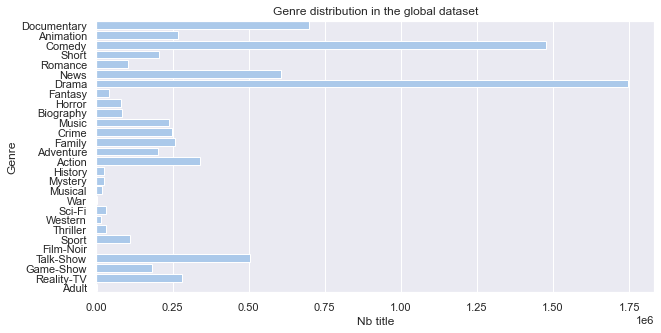

In [29]:
# distribution des genre 1, toute catégorie de titre confondue
fig= plt.figure(figsize=(10,5))
fig= plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.set_color_codes("pastel")
sns.countplot(y='genre 1', data=df_genre, color = 'b')
plt.title('Genre distribution in the global dataset')
plt.xlabel('Nb title')
plt.ylabel('Genre')

plt.show()

In [31]:
# 2e genre quand le premier est Drama
df_genre.loc[df_genre['genre 1'] == 'Drama', "genre 2"].value_counts()

Romance       392078
Short         172598
Family         75874
Mystery        31804
Fantasy        28857
History        21844
Reality-TV     13895
Horror         13240
Thriller       11451
Talk-Show       9472
Music           8771
Sci-Fi          6741
Musical         5771
War             5170
Sport           3035
Western          926
Game-Show        667
News             417
Film-Noir        138
Name: genre 2, dtype: int64

In [32]:
# 2e genre quand le premier est Comedy
df_genre.loc[df_genre['genre 1'] == 'Comedy', "genre 2"].value_counts()

Drama          236985
Short          136986
Talk-Show       91197
Family          85850
Music           69179
Romance         45375
Game-Show       39641
Crime           38700
News            37301
Documentary     20156
Reality-TV      18043
Horror          17042
Fantasy         13220
Musical          9642
Sci-Fi           5807
Sport            4869
History          3350
Mystery          2704
War              1265
Thriller          945
Western           800
Film-Noir           1
Name: genre 2, dtype: int64

<Figure size 720x360 with 0 Axes>

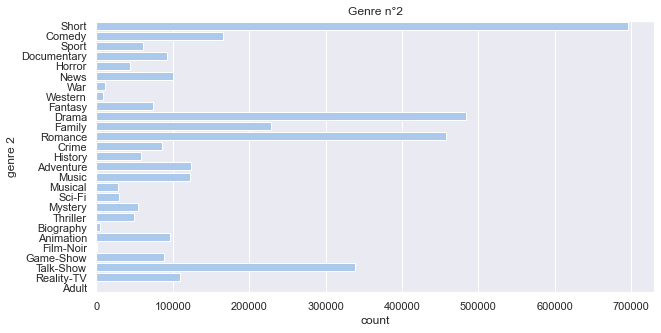

In [33]:
# distrib genre 2
fig= plt.figure(figsize=(10,5))
fig= plt.figure(figsize=(10,5))

sns.countplot(y='genre 2', data=df_genre, color='b')
plt.title('Genre n°2')
plt.show()

In [35]:
# genre des films
movies = df_genre[df_genre['titleType'] =='movie']

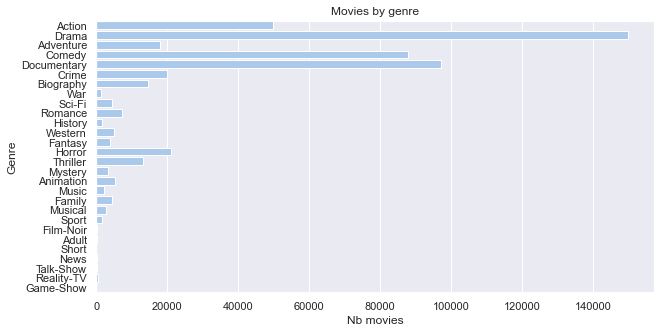

In [36]:
fig= plt.figure(figsize=(10,5))
sns.countplot(y='genre 1', data=movies, color='b')
plt.title('Movies by genre')
plt.xlabel('Nb movies')
plt.ylabel('Genre')
plt.show()

In [38]:
df_genre['titleType'].value_counts()

tvEpisode       6239146
short            841699
movie            593944
video            328437
tvSeries         216244
tvMovie          133655
tvMiniSeries      40632
tvSpecial         34814
videoGame         29695
tvShort           10347
tvPilot               2
Name: titleType, dtype: int64

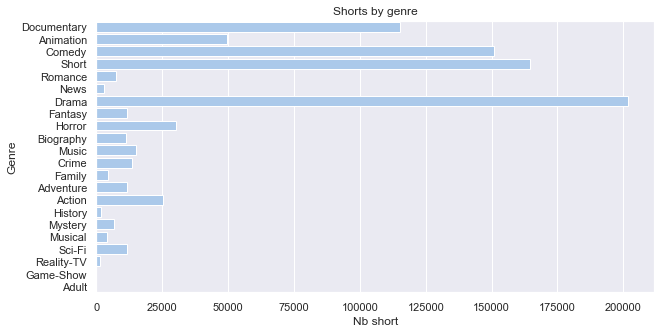

In [39]:
# genre des courts métrage
short = df_genre[df_genre['titleType'] =='short']

fig= plt.figure(figsize=(10,5))
sns.countplot(y='genre 1', data=short, color = 'b')
plt.title('Shorts by genre')
plt.xlabel('Nb short')
plt.ylabel('Genre')
plt.show()

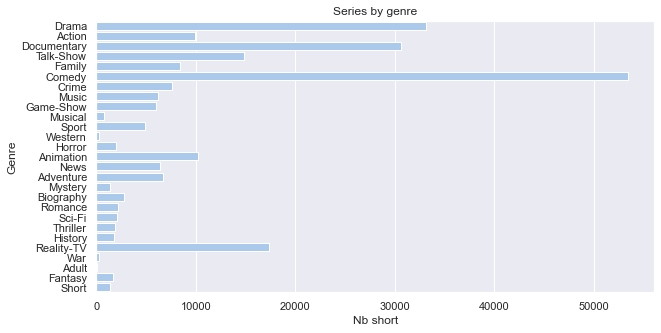

In [40]:
# genre des séries et mini séries
series = df_genre[(df_genre['titleType'] =='tvSeries') | (df_genre['titleType'] =='tvMiniSeries')]

fig= plt.figure(figsize=(10,5))
sns.countplot(y='genre 1', data=series, color='b')
plt.title('Series by genre')
plt.xlabel('Nb short')
plt.ylabel('Genre')
plt.show()

## 5.2 Genre les mieux notés et les plus notés

In [42]:
# importer ratings
# title.ratings
title_ratings= pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t')


In [43]:
ratings = title_ratings.copy()
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1836
1,tt0000002,6.0,236
2,tt0000003,6.5,1596
3,tt0000004,6.0,153
4,tt0000005,6.2,2412


In [44]:
# types de données et valeurs manquantes
ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [45]:
ratings.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [46]:
ratings[ratings['averageRating'] == '\\N']

,tconst,averageRating,numVotes


In [47]:
ratings[ratings['numVotes'] == '\\N']

,tconst,averageRating,numVotes


In [48]:
# faire une merge du df_genre avec ratings : inner join car je ne veux que les données qui sont communes aux 2 DS
genre_rating = df_genre.merge(ratings, on='tconst', how='inner')

In [49]:
genre_rating.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre 1,genre 2,genre 3,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short",Documentary,Short,None,5.7,1836
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short",Animation,Short,None,6.0,236
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance",Animation,Comedy,Romance,6.5,1596
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short",Animation,Short,None,6.0,153
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short",Comedy,Short,None,6.2,2412


In [50]:
print(ratings.shape)
print(df_genre.shape)
print(genre_rating.shape)

(1202679, 3)
(8468615, 12)
(1202679, 14)


In [51]:
# genre les plus notés sur tout le DS
pivot_vote_genre = genre_rating.pivot_table(index='genre 1', values='numVotes',aggfunc='sum')
pivot_vote_genre.sort_values(by='numVotes', ascending = False)

# les genres les plus notés sont action, comedy, drama, crime et Adventure

,numVotes
genre 1,
Action,368051099
Comedy,230428860
Drama,203519291
Adventure,109568095
Crime,108928686
Biography,56204785
Horror,38859128
Animation,19634563
Documentary,13798290


In [53]:
print(f"Nombre de vote minimal : {pivot_vote_genre['numVotes'].min()}")
print(f"Nombre de vote maximal : {pivot_vote_genre['numVotes'].max()}")
print(f"Nombre de vote moyen : {pivot_vote_genre['numVotes'].mean()}")
print(f"Nombre de vote median : {pivot_vote_genre['numVotes'].median()}")

Nombre de vote minimal : 7315
Nombre de vote maximal : 368051099
Nombre de vote moyen : 42008519.321428575
Nombre de vote median : 1642796.0


In [54]:
print(f"rating minimal : {genre_rating['averageRating'].min()}")
print(f"rating maximal : {genre_rating['averageRating'].max()}")
print(f"rating moyen : {genre_rating['averageRating'].mean()}")
print(f"rating median : {genre_rating['averageRating'].median()}")

rating minimal : 1.0
rating maximal : 10.0
rating moyen : 6.9230803065484725
rating median : 7.1


In [55]:
# genre les mieux notés en moyenne
pivot_rating_genre = genre_rating.pivot_table(index='genre 1', values ='averageRating')
pivot_rating_genre.sort_values(by='averageRating', ascending = False)

# les genres les mieux notés : History, Western, Documentary, Crime 

,averageRating
genre 1,
History,7.263513
Documentary,7.218888
Crime,7.181850
Biography,7.163051
Western,7.148728
Sport,7.084651
Action,7.024293
Adventure,6.989044
Comedy,6.958867


In [57]:
# 2e genre le plus représenté après genre 1
genre_rating.groupby('genre 1')['genre 2'].value_counts().sort_values(ascending = False)

genre 1    genre 2  
Action     Adventure    62099
Comedy     Drama        55599
Crime      Drama        52019
Animation  Comedy       34960
Drama      Romance      27429
                        ...  
Adult      Biography        1
Mystery    Sport            1
Action     Film-Noir        1
Romance    Talk-Show        1
Musical    Sport            1
Name: genre 2, Length: 333, dtype: int64

## 5.3 Genre des Films les plus notés et les mieux notés

In [58]:
movies_rating = genre_rating[genre_rating['titleType'] == 'movie']

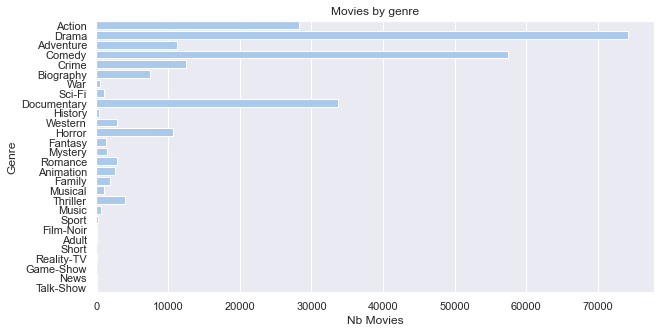

In [59]:
# Genre des films notés les plus représentés

fig= plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.set_color_codes("pastel")
sns.countplot(y='genre 1', data=movies_rating, color='b')
plt.title('Movies by genre')
plt.xlabel('Nb Movies')
plt.ylabel('Genre')
plt.show()

In [60]:
movies_vote_genre = movies_rating.pivot_table(index='genre 1', values='numVotes',aggfunc='sum')
movies_vote_genre.sort_values(by='numVotes', ascending = False)

,numVotes
genre 1,
Action,303429920
Comedy,174672992
Drama,160737041
Adventure,94682208
Crime,73712419
Biography,51686896
Horror,37249080
Documentary,7854083
Mystery,7104952


In [61]:
movies10_vote_genre = movies_vote_genre.sort_values(by='numVotes', ascending = False)[:10]
movies10_vote_genre


,numVotes
genre 1,
Action,303429920
Comedy,174672992
Drama,160737041
Adventure,94682208
Crime,73712419
Biography,51686896
Horror,37249080
Documentary,7854083
Mystery,7104952


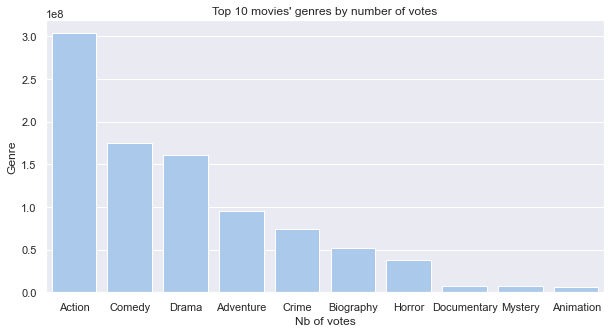

In [62]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x =movies10_vote_genre.index, 
            y="numVotes", 
            data= movies10_vote_genre,
            color="b")
plt.title("Top 10 movies' genres by number of votes")
plt.xlabel('Nb of votes')
plt.ylabel('Genre')
plt.show()


In [63]:
# movies by rating
movies_rating_genre = movies_rating.pivot_table(index='genre 1', values='averageRating')
movies_rating_genre.sort_values(by='averageRating', ascending = False)

,averageRating
genre 1,
Documentary,7.203044
Music,7.092751
Biography,6.966088
Game-Show,6.800000
Sport,6.685366
Talk-Show,6.671429
Film-Noir,6.613889
History,6.471531
Drama,6.259300


In [64]:
# pas très pertinent.
# regardons le rating pour les genres les plus notés : movies10_vote_genre

movies10_rating_genre = movies10_vote_genre.merge(movies_rating_genre, how='inner', on = 'genre 1')
movies10_rating_genre.sort_values(by='averageRating', ascending=False)

,numVotes,averageRating
genre 1,,
Documentary,7854083,7.203044
Biography,51686896,6.966088
Drama,160737041,6.259300
Animation,6394276,6.128571
Crime,73712419,6.065235
Adventure,94682208,5.980239
Comedy,174672992,5.915831
Mystery,7104952,5.885415
Action,303429920,5.695263


In [66]:
# TOP 20 des films ayant le plus de votes et triés par rating
top_20_movies = movies_rating.sort_values(by='numVotes', ascending = False).head(20).sort_values(by='averageRating', ascending = False)

In [68]:
# genre de ce top 20:
print('genre complet: \n', top_20_movies['genres'].value_counts())
print('\n genre 1: \n', top_20_movies['genre 1'].value_counts())
print('\n genre 2: \n', top_20_movies['genre 2'].value_counts())

genre complet: 
 Action,Adventure,Drama     4
Crime,Drama                2
Drama                      2
Action,Adventure,Sci-Fi    2
Drama,Western              1
Drama,Romance              1
Action,Crime               1
Crime,Drama,Mystery        1
Crime,Drama,Horror         1
Action,Sci-Fi              1
Adventure,Drama,Sci-Fi     1
Action,Crime,Drama         1
Action,Adventure           1
Adventure,Drama,War        1
Name: genres, dtype: int64

 genre 1: 
 Action       10
Drama         4
Crime         4
Adventure     2
Name: genre 1, dtype: int64

 genre 2: 
 Adventure    7
Drama        6
Crime        2
Sci-Fi       1
Western      1
Romance      1
Name: genre 2, dtype: int64


## 6. Exploration sur les années

In [70]:
# faire un dataset copie de df_genre ou on supprime les années sans le startyear
df_genre_dropna_year = df_genre[df_genre['startYear'].notna()].copy()
genre_rating_dropna_year = genre_rating[genre_rating['startYear'].notna()].copy()
movies_rating_dropna_year = movies_rating[movies_rating['startYear'].notna()].copy()


In [71]:
# et transforme la colonne en int
df_genre_dropna_year['startYear'] = df_genre_dropna_year['startYear'].astype(int)
genre_rating_dropna_year['startYear'] = genre_rating_dropna_year['startYear'].astype(int)
movies_rating_dropna_year['startYear'] = movies_rating_dropna_year['startYear'].astype(int)

In [72]:

print(f"Sur tout le dataset, le titre le plus ancien date de : {df_genre_dropna_year['startYear'].min()}")
print(f"Sur tout le dataset, le titre le plus récent date de : {df_genre_dropna_year['startYear'].max()}")
print(f"Sur les titres notés, le titre le plus ancien date de : {genre_rating_dropna_year['startYear'].min()}")
print(f"Sur les titres notés, le titre le plus récent date de : {genre_rating_dropna_year['startYear'].max()}")
print(f"Sur les films notés, le titre le plus ancien date de : {movies_rating_dropna_year['startYear'].min()}")
print(f"Sur les films notés, le titre le plus récent date de : {movies_rating_dropna_year['startYear'].max()}")

Sur tout le dataset, le titre le plus ancien date de : 1874
Sur tout le dataset, le titre le plus récent date de : 2028
Sur les titres notés, le titre le plus ancien date de : 1874
Sur les titres notés, le titre le plus récent date de : 2021
Sur les films notés, le titre le plus ancien date de : 1896
Sur les films notés, le titre le plus récent date de : 2021


In [73]:
# il y a des années supérieurs à 2021 dans le dataset complet. Lesquelles sont? 
# subset de ces films à venir
sorties_a_venir = df_genre_dropna_year[df_genre_dropna_year['startYear'] > 2021]

In [74]:
# rajout d'une colonne décennie (à faire tourner au début)
# before 1900 
def decennie(x):
    if x < 1900:
        return '<1900'
    elif 1900 <= x < 1910:
        return '1900 - 1910'
    elif 1910 <= x < 1920:
        return "1910 - 1920"
    elif 1920 <= x < 1930:
        return "1920 - 1930"
    elif 1930 <= x < 1940:
        return "1930 - 1940"
    elif 1940 <= x < 1950:
        return "1940 - 1950"
    elif 1950 <= x < 1960:
        return "1950 - 1960"
    elif 1960 <= x < 1970:
        return "1960 - 1970"
    elif 1970 <= x < 1980:
        return "1970 - 1980"
    elif 1980<= x < 1990:
        return "1980 - 1990"
    elif 1990 <= x < 2000:
        return "1990 - 2000"
    elif 2000 <= x < 2010:
        return "2000 - 2010"
    elif 2010 <= x < 2020:
        return "2010 - 2020"
    elif 2020 <= x < 2030:
        return "2020 - 2030"
    

In [75]:
# j'apply cette fonction sur mes 3 datasets
df_genre_dropna_year['decade'] = df_genre_dropna_year['startYear'].apply(decennie)
genre_rating_dropna_year['decade'] = genre_rating_dropna_year['startYear'].apply(decennie)
movies_rating_dropna_year['decade'] = movies_rating_dropna_year['startYear'].apply(decennie)



In [76]:
# pareil pour les séries
series_rating = genre_rating[(genre_rating['titleType'] =='tvSeries') | (genre_rating['titleType'] =='tvMiniSeries')]
series_rating_dropna_year = series_rating[series_rating['startYear'].notna()].copy()
series_rating_dropna_year['startYear'] = series_rating_dropna_year['startYear'].astype(int)
series_rating_dropna_year['decade'] = series_rating_dropna_year['startYear'].apply(decennie)


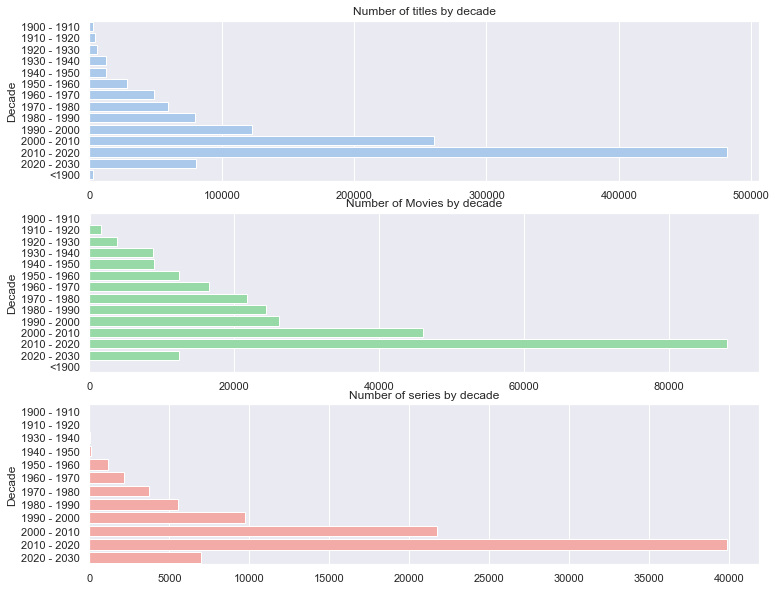

In [77]:
fig, ax = plt.subplots(3,1, figsize=(12,10))
ax1= plt.subplot(311)
ax1 = sns.countplot(y='decade', data=genre_rating_dropna_year.sort_values(by='decade'), color='b')
ax1.set_title('Number of titles by decade')
ax1.set_xlabel('')
ax1.set_ylabel('Decade')

ax2 = plt.subplot(312)
ax2 = sns.countplot(y='decade', data=movies_rating_dropna_year.sort_values(by='decade'), color='g')
ax2.set_title('Number of Movies by decade')
ax2.set_xlabel('')
ax2.set_ylabel('Decade')

ax3 = plt.subplot(313)
ax1 = sns.countplot(y='decade', data=series_rating_dropna_year.sort_values(by='decade'), color='r')
ax3.set_title('Number of series by decade')
ax3.set_xlabel('')
ax3.set_ylabel('Decade')
plt.show()

In [78]:
# durée des films par année
movies_rating_dropna_year['runtimeMinutes'] = movies_rating_dropna_year['runtimeMinutes'].astype('float')

In [79]:
print(f"Durée minimale : {movies_rating_dropna_year['runtimeMinutes'].min()}")
print(f"Durée maximale : {movies_rating_dropna_year['runtimeMinutes'].max()}")
print(f"Durée moyenne : {movies_rating_dropna_year['runtimeMinutes'].mean()}")

Durée minimale : 2.0
Durée maximale : 51420.0
Durée moyenne : 94.31962380281286


In [80]:
# recherche des films ayant une durée inférieur à 60min : 13.5K
(movies_rating_dropna_year['runtimeMinutes'] < 60).sum()
# recherche des films supérieurs à 4h : 446
(movies_rating_dropna_year['runtimeMinutes'] > 240).sum()

446

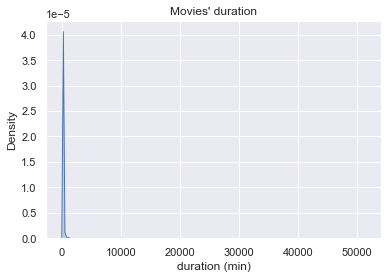

In [81]:
plt.figure()
sns.kdeplot(x='runtimeMinutes', data=movies_rating_dropna_year, shade=True)
plt.xlabel('duration (min)')
plt.title("Movies' duration")
plt.show()

In [82]:
# filtre sudu dataset en enlevant ces données
movies_rating_dropna_year = movies_rating_dropna_year[(movies_rating_dropna_year['runtimeMinutes'] >= 60) & (movies_rating_dropna_year['runtimeMinutes'] <240)]
movies_rating_dropna_year.shape

(229356, 15)

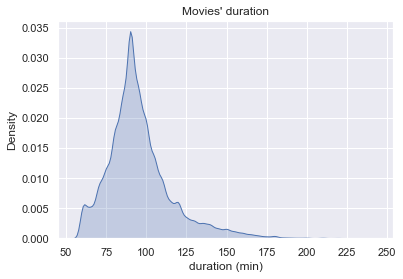

In [83]:
plt.figure()
sns.kdeplot(x='runtimeMinutes', data=movies_rating_dropna_year, shade=True)
plt.xlabel('duration (min)')
plt.title("Movies' duration")
plt.show()

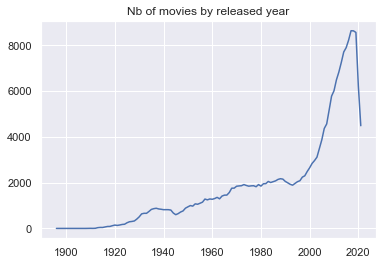

In [84]:
# Nombre de films sortis par années
sns.lineplot(x=movies_rating_dropna_year['startYear'].value_counts().index, y=movies_rating_dropna_year['startYear'].value_counts().values)
plt.title("Nb of movies by released year")
plt.show()

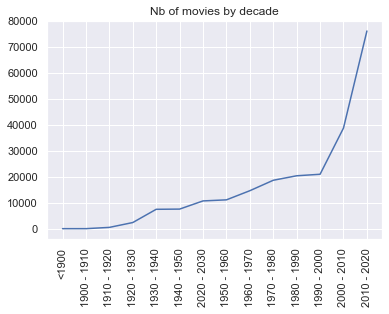

In [85]:
# nombre de films par décénies
sns.lineplot(x=movies_rating_dropna_year['decade'].value_counts().sort_values().index, y=movies_rating_dropna_year['decade'].value_counts().sort_values().values)
plt.title("Nb of movies by decade")
plt.xticks(rotation = 90)
plt.show()

In [86]:
# durée moyenne des films par décennie
pivot_decade_runtime = movies_rating_dropna_year.pivot_table(index='decade', values='runtimeMinutes', aggfunc='mean')
pivot_decade_runtime

,runtimeMinutes
decade,
1900 - 1910,85.666667
1910 - 1920,79.397980
1920 - 1930,82.638901
1930 - 1940,82.302625
1940 - 1950,87.868937
1950 - 1960,93.281073
1960 - 1970,96.242673
1970 - 1980,95.852036
1980 - 1990,97.554482


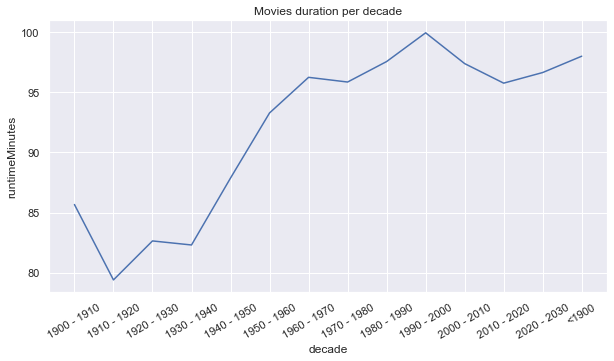

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = pivot_decade_runtime, x=pivot_decade_runtime.index, y='runtimeMinutes')
ax.set_title('Movies duration per decade')
plt.xticks(rotation = 30)
plt.show()

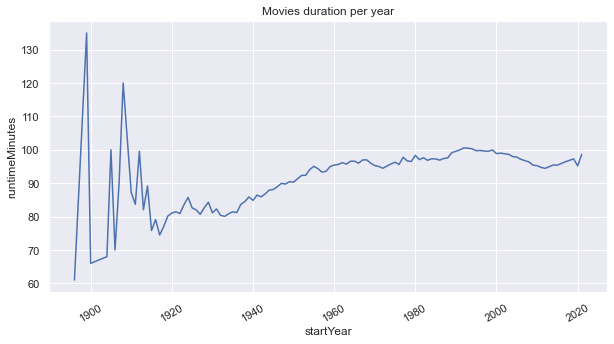

In [88]:
# durée moyenne des films par année
pivot_year_runtime = movies_rating_dropna_year.pivot_table(index='startYear', values='runtimeMinutes', aggfunc='mean')
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = pivot_year_runtime, x=pivot_year_runtime.index, y='runtimeMinutes')
ax.set_title('Movies duration per year')
plt.xticks(rotation = 30)
plt.show()

In [89]:
movies_rating_dropna_year['runtimeMinutes'].mean()

95.66734247196499

In [ ]:
# genre par années (ou décénies)
pivot_decade_genre = movies_rating_dropna_year.pivot_table(index = 'decade', columns='genre 1', aggfunc='count')
pivot_decade_genre

In [91]:
# genre les plus produits la dernière décennie
last_decade = movies_rating_dropna_year[movies_rating_dropna_year['decade'] == '2010 - 2020']

# création d'un dataset sur la dernière décennie qui ne comprend que le top 10 des genres produits
last_decade_top10_genre = last_decade[last_decade['genre 1'].isin(last_decade['genre 1'].value_counts()[:10].index)]
last_decade_top10_genre['genre 2'].value_counts()

Drama          11060
Romance         3634
Documentary     3358
Thriller        2884
Horror          2346
Comedy          2337
Crime           2048
Family          1824
Mystery         1767
History         1494
Adventure       1411
Music           1122
Fantasy         1059
Sci-Fi           787
Animation        687
Sport            597
Biography        347
War              321
Musical          266
News             198
Western           86
Reality-TV         3
Name: genre 2, dtype: int64

Reco de filtre:
- films adult ==0)
- durée plus de 60 min et moins de 240min (4h)
- avec un nombre de vote supérieur à 500
- moyenne > à la moyenne des notes de tous les films